In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [199]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
import pandas as pd
import re
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

## Machine Learning: Programming Exercise 6
## Support Vector Machines
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. 
## 1. Support Vector Machines
In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.
### 1.1 Example dataset 1
We will begin with a 2D example dataset which can be separated by a linear boundary. The code below will plot the training data (Figure 1). In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example (+) on the far left at about (0:1; 4:1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

In [65]:
mat = scipy.io.loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 1: Example Dataset 1')

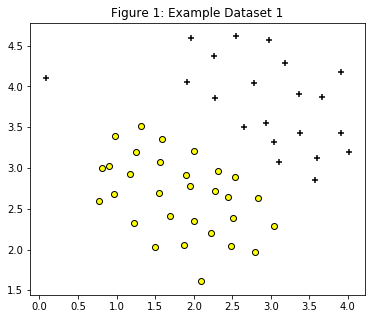

In [66]:
pos = X[np.where(y.flatten()==1)[0]]
neg = X[np.where(y.flatten()==0)[0]]
plt.figure(figsize=(6,5))
plt.scatter(x = pos[:,0], y =pos[:,1], marker='+', c='black')
plt.scatter(x = neg[:,0], y =neg[:,1], marker='o', c='yellow', edgecolor='black')
plt.title('Figure 1: Example Dataset 1')

 In this part of the exercise, you will try using different values of the  parameter with SVMs. Informally, the  parameter is a positive value that controls the penalty for misclassiffed training examples. A large  parameter tells the SVM to try to classify all the examples correctly.  plays a role similar to , where  is the regularization parameter that we were using previously for logistic regression.  
 Your task is to try different values of  on this dataset. Specifically, use the control to change the value of  in the script to  and run the SVM training code in the previous section again. When , you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data

In [67]:
clf = svm.SVC(C=100.0, kernel='linear')
clf.fit(X, y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - .1, x.max() + .1
    y_min, y_max = y.min() - .1, y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0.5, 1.0, 'Decision surface of linear SVC ')

No handles with labels found to put in legend.


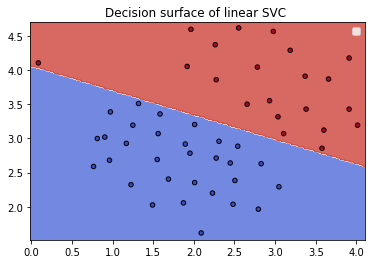

In [69]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### 1.2 SVM with gaussian kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 
#### 1.2.1 Gaussian kernel
To find nonlinear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the 'distance' between a pair of examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. 

The Gaussian kernel function is dened as:
<center>$K_{gaussian}(x^{(i)},x^{(j)})
=\exp\left(-\frac{\left\| x^{(i)}-x^{(j)}\right\|^2}{2\sigma^2}\right)
=\exp\left(-\frac{\sum_{k=1}^n{(x_k^{(i)}-x_k^{(j)})^2}}{2\sigma^2}\right)$</center>

In [49]:
def gaussianKernel(x1, x2, sigma):
    sim = np.exp(-np.sum((x1-x2)**2)/(2*sigma**2))
    return sim

In [51]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 0.5 : ', sim)

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 0.5 :  0.32465246735834974


#### 1.2.2 Example dataset 2
The next code section will load and plot dataset 2 (Figure 4). From the figure, you can observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. 

In [70]:
mat = scipy.io.loadmat('ex6data2.mat')
X = mat['X']
y = mat['y']

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 1: Example Dataset 2')

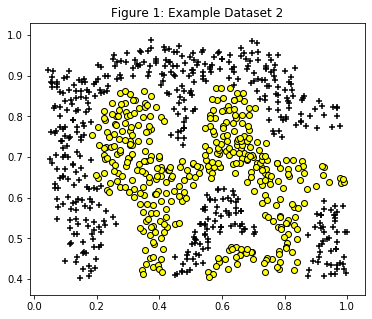

In [71]:
pos = X[np.where(y.flatten()==1)[0]]
neg = X[np.where(y.flatten()==0)[0]]
plt.figure(figsize=(6,5))
plt.scatter(x = pos[:,0], y =pos[:,1], marker='+', c='black')
plt.scatter(x = neg[:,0], y =neg[:,1], marker='o', c='yellow', edgecolor='black')
plt.title('Figure 1: Example Dataset 2')

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 1.0, 'Decision surface of Gaussian SVC ')

No handles with labels found to put in legend.


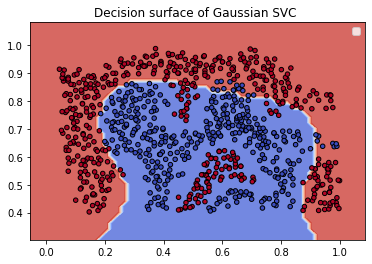

In [89]:
clf = svm.SVC(C=1, gamma=100, kernel='rbf')
clf.fit(X, y)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Gaussian SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### 1.2.3 Example dataset 3
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The code below will load and display a third dataset (Figure 6). 

In [98]:
mat = scipy.io.loadmat('ex6data3.mat')
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Figure 1: Example Dataset 3')

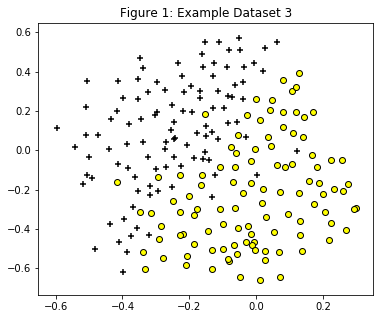

In [92]:
pos = X[np.where(y.flatten()==1)[0]]
neg = X[np.where(y.flatten()==0)[0]]
plt.figure(figsize=(6,5))
plt.scatter(x = pos[:,0], y =pos[:,1], marker='+', c='black')
plt.scatter(x = neg[:,0], y =neg[:,1], marker='o', c='yellow', edgecolor='black')
plt.title('Figure 1: Example Dataset 3')

Your task is to use the cross validation set Xval, yval to determine the best  and  parameter to use. You should write any additional code necessary to help you search over the parameters  and . For both  and  we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for  and  (e.g.,  and ). For example, if you try each of the 8 values listed above for  and for , you would end up training and evaluating (on the cross validation set) a total of  = 64 different models. 

In [108]:
best_C = None
best_sigma = None
min_error = float('inf')

for C_test in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    for sigma_test in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        clf = svm.SVC(C=C_test, gamma=sigma_test, kernel='rbf')
        clf.fit(X, y)
        pred = clf.predict(Xval)
        pred_error = np.mean(pred!=yval)
        if pred_error < min_error:
            best_C = C_test
            best_sigma = sigma_test
            min_error = pred_error

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
min_error
best_C
best_sigma

0.48635

30

0.3

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5, 1.0, 'Decision surface of Gaussian SVC ')

No handles with labels found to put in legend.


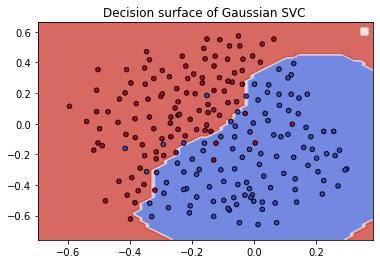

In [117]:
clf = svm.SVC(C=best_C, gamma=best_C, kernel='rbf')
clf.fit(X, y)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Gaussian SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## 2. Spam Classification
You will be training a classifier to classify whether a given email, $x$, is spam ($y=1$) or non-spam ($y=0$). In particular, you need to convert each email into a feature vector $x\in\mathbb{R}^n$. The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.  
    The dataset included for this exercise is based on a a subset of the SpamAssassin Public Corpus. For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).
### 2.1 Preprocessing emails
Therefore, one method often employed in processing emails is to 'normalize' these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string "httpaddr" to indicate that a URL was present. This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.

In [246]:
def processEmail(email_contents):
    vocabList = list(pd.read_csv('vocab.txt', header=None, sep='\t').iloc[:,1].values)
    word_indices = []
    ## Lower case
    email_contents = email_contents.lower()
    ## Strip all HTML Looks for any expression that starts with < and ends with > and replace
    ## and does not have any < or > in the tag it with a space
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    ## Handle URLS, Look for strings starting with http:// or https://
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr',email_contents)
    ## Handle Email Addresses, Look for strings with @ in the middle
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    ## Handle $ sign
    email_contents = re.sub(r'[$]+', 'dollar', email_contents)
    ## Handle Numbers, Look for one or more characters between 0-9
    email_contents = re.sub(r'[0-9]+', 'number',email_contents)
    ## get rid of any punctuation
    chars = re.escape(string.punctuation)
    email_contents = re.sub(r'['+chars+']', '',email_contents)
    
    
    ## ========================== Tokenize Email ===========================
    if len(email_contents) > 0:
        ## Tokenize
        words = word_tokenize(email_contents)
        ps = PorterStemmer()
        for i, w in enumerate(words):
            ## Remove any non alphanumeric characters
            w = re.sub(r'[^a-zA-Z0-9]', '', w)
            ## Stem the word
            w = ps.stem(w)
            ## Look up the word in the dictionary and add to word_indices 
            try:
                word_indices.append(vocabList.index(w))
            except:
                pass
    return word_indices

In [247]:
with open('emailSample1.txt', 'r') as file:
    file_contents = file.read().replace('\n', '')

In [249]:
word_indices = processEmail(file_contents)

In [250]:
word_indices

[85,
 915,
 793,
 1076,
 882,
 369,
 1698,
 789,
 1821,
 1830,
 882,
 430,
 1170,
 793,
 1001,
 1894,
 237,
 161,
 88,
 687,
 944,
 1662,
 1119,
 1061,
 1698,
 374,
 1161,
 478,
 1892,
 1509,
 798,
 1181,
 1236,
 809,
 1894,
 1439,
 1546,
 1757,
 1895,
 687,
 1675,
 991,
 960,
 1476,
 70,
 529,
 530]

### 2.2 Extracting features from emails
You will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^n$. For this exercise, you will be using words in vocabulary list. Specically, the feature for $x_i\in\{0,\;1\}$ an email corresponds to whether the $i$-th word in the dictionary occurs in the email. That is, $x_i = 1$ if the $i$-th word is in the email and $x_i = 0$ if the $i$-th word is not present in the email.  

Thus, for a typical email, this feature would look like:
<center>  $ x = \left[ \begin{array}{c}
0 \\
\vdots \\
1 \\
0 \\
\vdots \\
1 \\
0 \\
\vdots \\
0
\end{array} \right] \in R^{n}$ </center>

In [261]:
def emailFeatures(word_indices):
    ## Total number of words in the dictionary
    n = 1899
    ## You need to return the following variables correctly.
    x = np.zeros((n, 1))
    x[word_indices] = 1
    return x

In [262]:
features = emailFeatures(word_indices)

In [264]:
print('Length of feature vector: ', len(features))

Length of feature vector:  1899


In [265]:
print('Number of non-zero entries: ', np.sum(features > 0))

Number of non-zero entries:  42


### 2.3 Training SVM for spam classification
After you have completed the feature extraction functions, the code in this section will load a preprocessed training dataset that will be used to train an SVM classifier. spamTrain.mat contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email was processed using the processEmail and emailFeatures functions and converted into a vector $x^{(i)}\in\mathbb{R}^{1899|}$. 

In [270]:
mat = scipy.io.loadmat('spamTrain.mat')
X = mat['X']
y = mat['y']

In [276]:
mat = scipy.io.loadmat('spamTest.mat')
Xtest = mat['Xtest']
ytest = mat['ytest']

In [314]:
clf = svm.SVC(C=1, gamma=100, kernel='rbf')
clf.fit(X, y)
pred = clf.predict(X)
print('Training Accuracy: %s%%'%(np.mean(pred == y) * 100))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training Accuracy: 0.565341125%Training

In [277]:
pred = clf.predict(Xtest)
print('Training Accuracy: ', np.mean(pred == ytest) * 100)

Training Accuracy:  57.1424


### 2.4 Top predictors for spam
To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. The code below finds the parameters with the largest positive values in the classier and displays the corresponding words (Figure 12). Thus, if an email contains words such as 'guarantee', 'remove', 'dollar', and 'price' (the top predictors shown in Figure 12), it is likely to be classied as spam.

In [292]:
weights = np.abs(clf.coef_[0])

In [293]:
n = 1899
ranked = np.argsort(weights)
largest_indices = ranked[::-1][:n]

In [294]:
largest_indices

array([ 798,  530,  656, ..., 1282,  689,  124])

In [299]:
vocabList = list(pd.read_csv('vocab.txt', header=None, sep='\t').iloc[:,1].values)
for i in range(15):
    if i == 0:
        print('Top predictors of spam: \n')
    print(vocabList[largest_indices[i]], weights[largest_indices[i]], '\n')

Top predictors of spam: 

httpaddr 2.0000234993181505 

emailaddr 1.9998505211891 

flash 1.9142010351409557 

subscrib 1.1327042951112138 

wrote 1.0841735895682314 

tm 0.9939901395154189 

visit 0.9805483336525234 

address 0.9329842692465232 

stuff 0.9158723948739119 

our 0.8984880172790379 

remov 0.8708959278696715 

irish 0.8678067073930396 

click 0.8479070133615014 

kill 0.8361722806466337 

user 0.76900640141068 

